----
<h1 align="center"><span style='font-family:Georgia'>Results Visualization </span></h1>

---

## Notebook Decription:

The notebook aims to visualize the performance of five trained models on different five datasets (ETDatasets and Cryptocurrency). The results from the testing phase of each model were saved as numpy files in the "/results" directory. 

**1. Loading Results:** First loads the saved numpy files containing the testing results for each model. These results could include metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), or any other relevant metrics.

**2. Visualizations:** 

- **Line Plots:** Show the performance of each model over time. 
- **Bar Plots:** Bar plots may be used to compare the performance of different models on specific metrics. 

**NOTE:**
> In order to visualize the results, you need to run the training notebook before this notebook (the training notebook generates the results directory).

In [1]:
!pip install mplfinance 

**Import needed dependencies**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

%matplotlib inline

**Allocate color palette**

In [123]:
RdBu_colors  = sns.color_palette("RdBu",15)
blind_colors = sns.color_palette("husl", 6)
sns.set_theme(style="whitegrid", palette=blind_colors)

style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 10});
fig = mpf.figure(figsize=(12, 6), style=style);

RdBu_colors
blind_colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

<Mpf_Figure size 1200x600 with 0 Axes>

In [150]:
def Visualize_Error(dataset, pred_len, ax, models=['DLinear', 'NLinear',  'informer', 'FEDformer', 'PatchTST42', 'PatchTST64'] ):
    
    bar_width = 0.3
    r1 = np.arange(len(models))
    r2 = r1 + bar_width 
    
    mae_values , mse_values = [], [], 
    
     
    for i, model_name in enumerate(models):
        
        if model_name == 'PatchTST42':
            setting = f'PatchTST_train_on_{dataset}_'+str(pred_len)+'_42'
        elif model_name == 'PatchTST64':
            setting = f'PatchTST_train_on_{dataset}_'+str(pred_len)+'_64'
        else:
            setting = model_name+f'_train_on_{dataset}_'+str(pred_len)
            
        try:
            errors = np.load('./results/'+ setting +'/metrics.npy', allow_pickle=True)[:2]
            mae_values.append(errors[0])
            mse_values.append(errors[1])
        
        except FileNotFoundError as e:
            print(f"{setting} File not found ... ")                       

    # Create the bar plot for MSE
    ax.bar(r1, mse_values, color=RdBu_colors[-1], width=bar_width, label='MSE') #, edgecolor='black'
    # Create the bar plot for MAE
    ax.bar(r2, mae_values, color=RdBu_colors[0], width=bar_width, label='MAE')
    
    ax.set_xticks([r + bar_width / 2 for r in range(len(models))], models)
    ax.set_title(f"MSE and MAE for [{pred_len}] Prediction Length in {dataset} Dataset", fontsize=10)
    ax.legend(loc='upper left', fontsize = 9)
    
    return mae_values, mse_values


In [273]:
def Evaluate( dataset, pred_len, ax, models=['DLinear', 'NLinear',  'informer', 'FEDformer', 'PatchTST42', 'PatchTST64'] , target = 'OT'):
    """
    Plots the predicted and true values for a given model and prediction horizon (pred_len).

    Args:
    model_name (str): The name of the model used to make predictions.
    pred_len (int): The length of the prediction horizon (i.e., the number of future values to predict).
    ax (matplotlib.axes.Axes): A Matplotlib Axes object on which to draw the plot.
    colors (List[str]): A list of two colors to use for the actual and predicted lines, respectively.
    
    """
    if ['DLinear', 'NLinear'] not in models:
        setting = f'FEDformer_train_on_{dataset}_'+str(pred_len)
    else: 
        setting = f'DLinear_train_on_{dataset}_'+str(pred_len)
    
    trues = np.load('./results/'+ setting +'/true.npy') # [samples, pred_len, dimensions]

    sns.lineplot(x=range(len(trues[0,:,-1])), y=trues[0, : ,-1], label="Ground Truth", #marker='o', alpha=0.7,
                 color=RdBu_colors[0] , ax=ax, linewidth=1.3) 
    
    for i, model_name in enumerate(models):
        
        
        if model_name == 'PatchTST42':
            setting = f'PatchTST_train_on_{dataset}_'+str(pred_len)+'_42'
        elif model_name == 'PatchTST64':
            setting = f'PatchTST_train_on_{dataset}_'+str(pred_len)+'_64'
        else:
            setting = model_name+f'_train_on_{dataset}_'+str(pred_len)
            
        try:
            preds = np.load('./results/' + setting + '/pred.npy', allow_pickle=True)
            sns.lineplot(x=range(len(preds[0,:,-1])), y=preds[0,:,-1],
                     label=model_name, color=blind_colors[i], ax=ax, linewidth=1)
        except FileNotFoundError as e:
            print(f"{setting} File not found ... ")
        
    ax.set_xticks([])
    ax.set_title(f"Results of [{pred_len}] Prediction Length of `{target}` Column", fontsize=12)
#     ax.legend(loc='best', fontsize = 9)
    legend = ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=9)
    plt.subplots_adjust(right=0.7) 


---
### Evaluating the `ETTh1` dataset

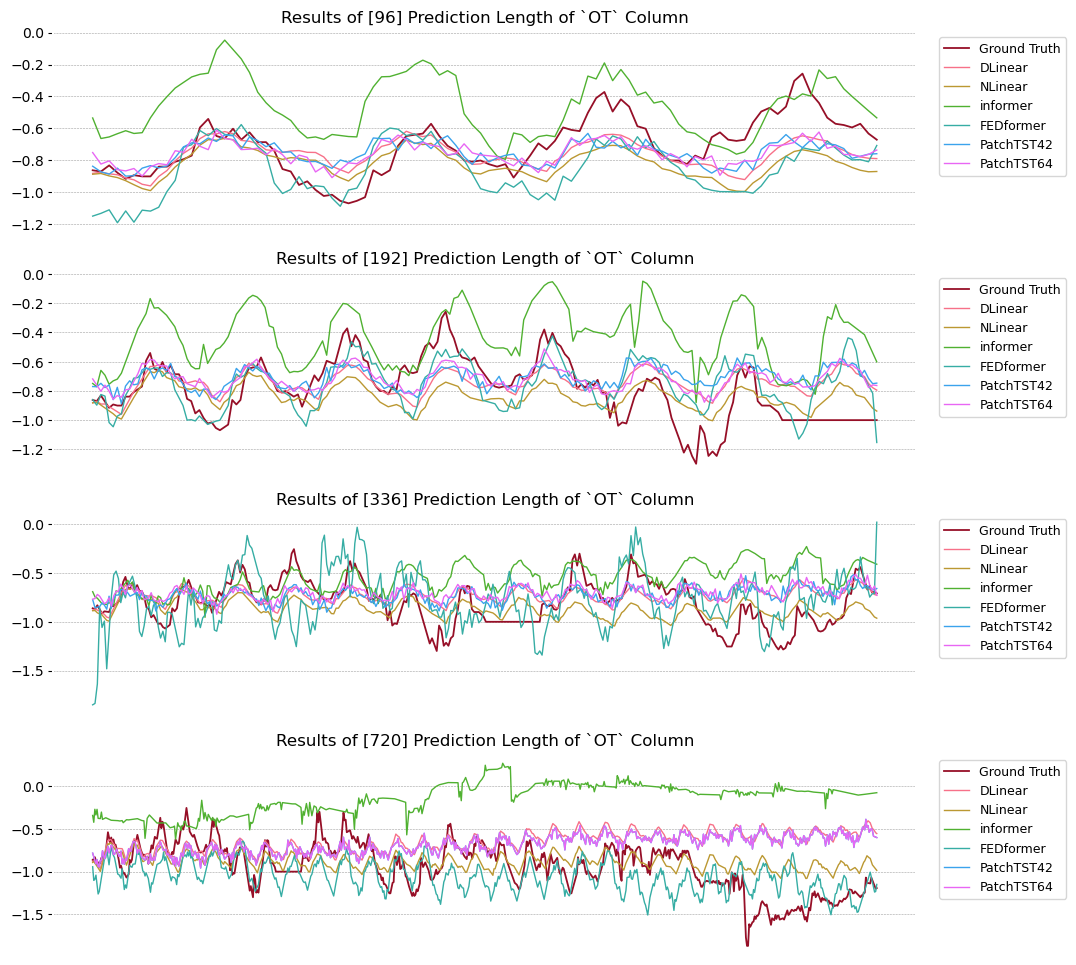

In [264]:
dataset='ETTh1'
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

for i, pred_len in enumerate([96,192,336,720]):
    
    Evaluate(dataset, pred_len, axs[i])

plt.show()

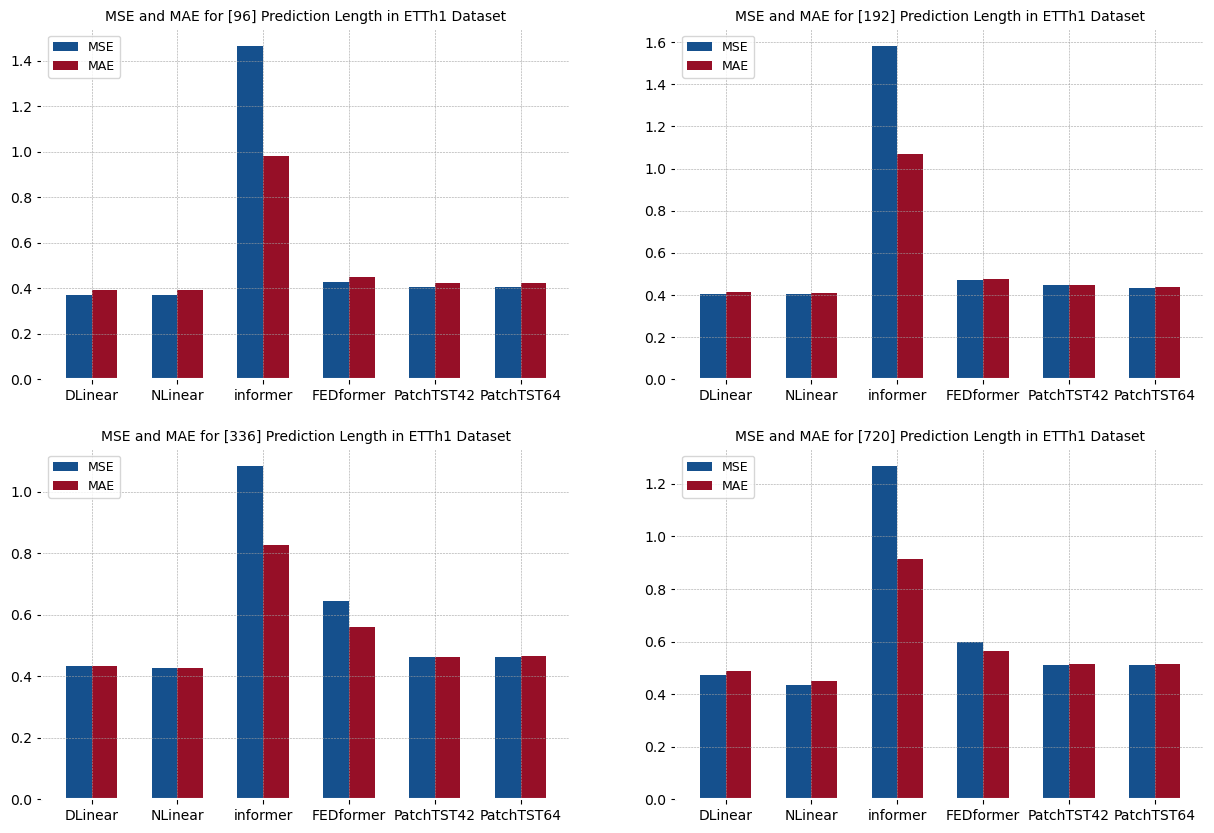

In [265]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Visualize_Error(dataset, pred_len, ax)
    
plt.show()

---
### Evaluating the `ETTh2` dataset

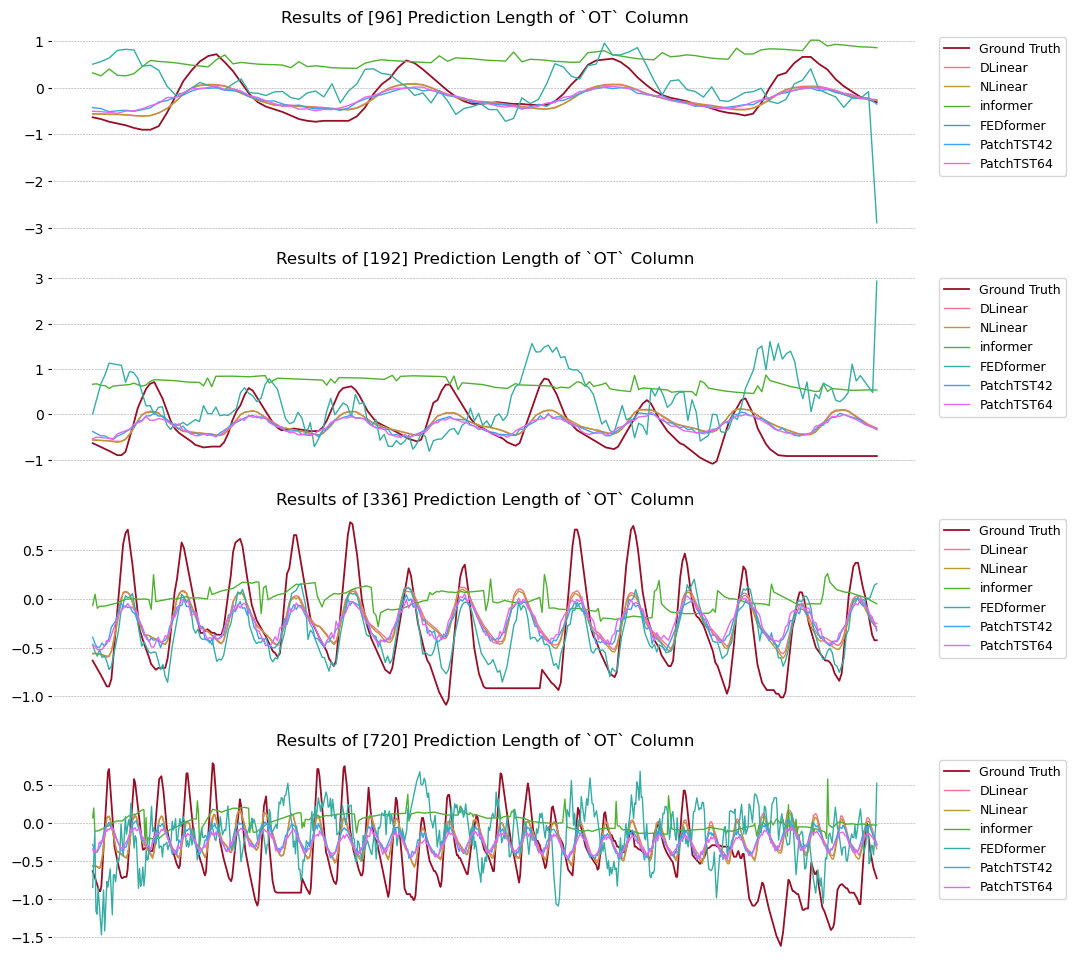

In [266]:
dataset='ETTh2'
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

for i, pred_len in enumerate([96,192,336,720]):
    
    Evaluate(dataset, pred_len, axs[i])

plt.show()

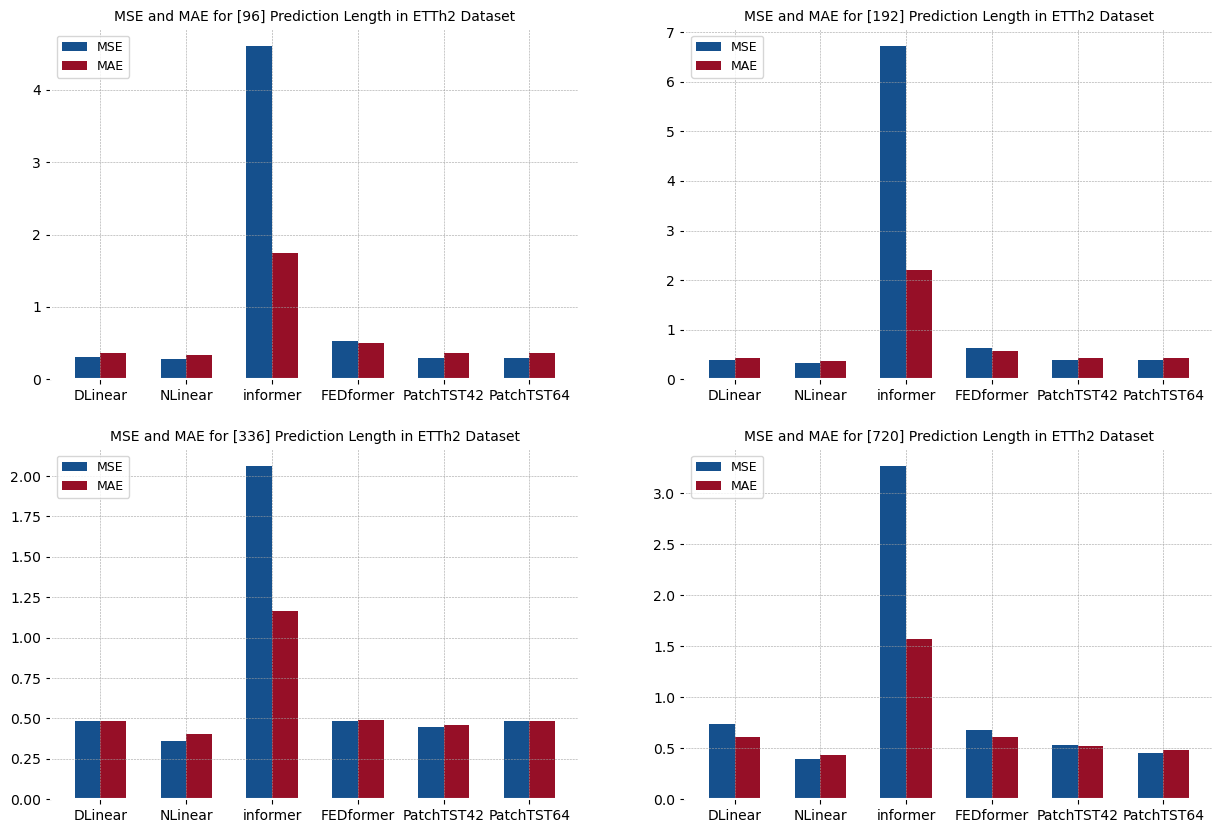

In [267]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Visualize_Error(dataset, pred_len, ax)
    
plt.show()

---
### Evaluating the `ETTm1` dataset

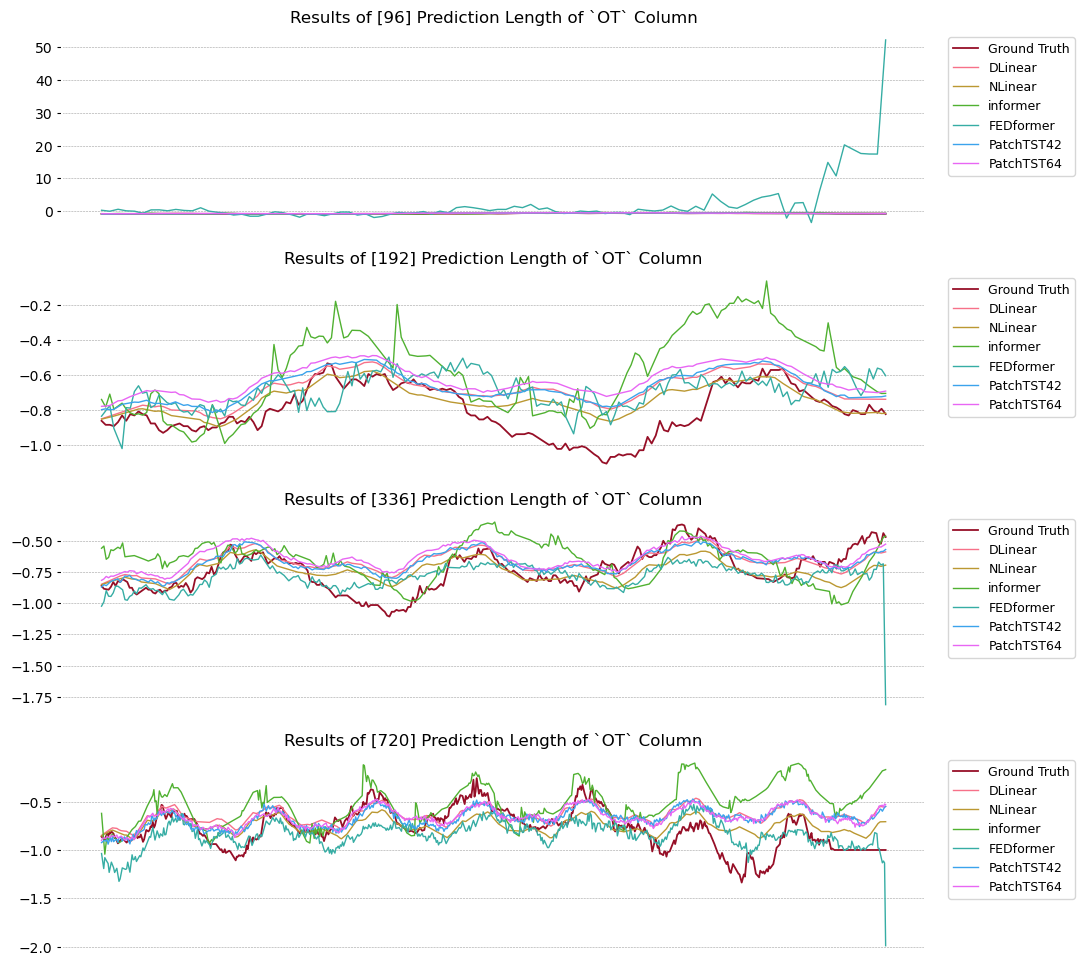

In [301]:
dataset='ETTm1'
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

for i, pred_len in enumerate([96,192,336,720]):
    
    Evaluate(dataset, pred_len, axs[i],models=['DLinear', 'NLinear', 'informer','FEDformer', 'PatchTST42', "PatchTST64"])
plt.show()

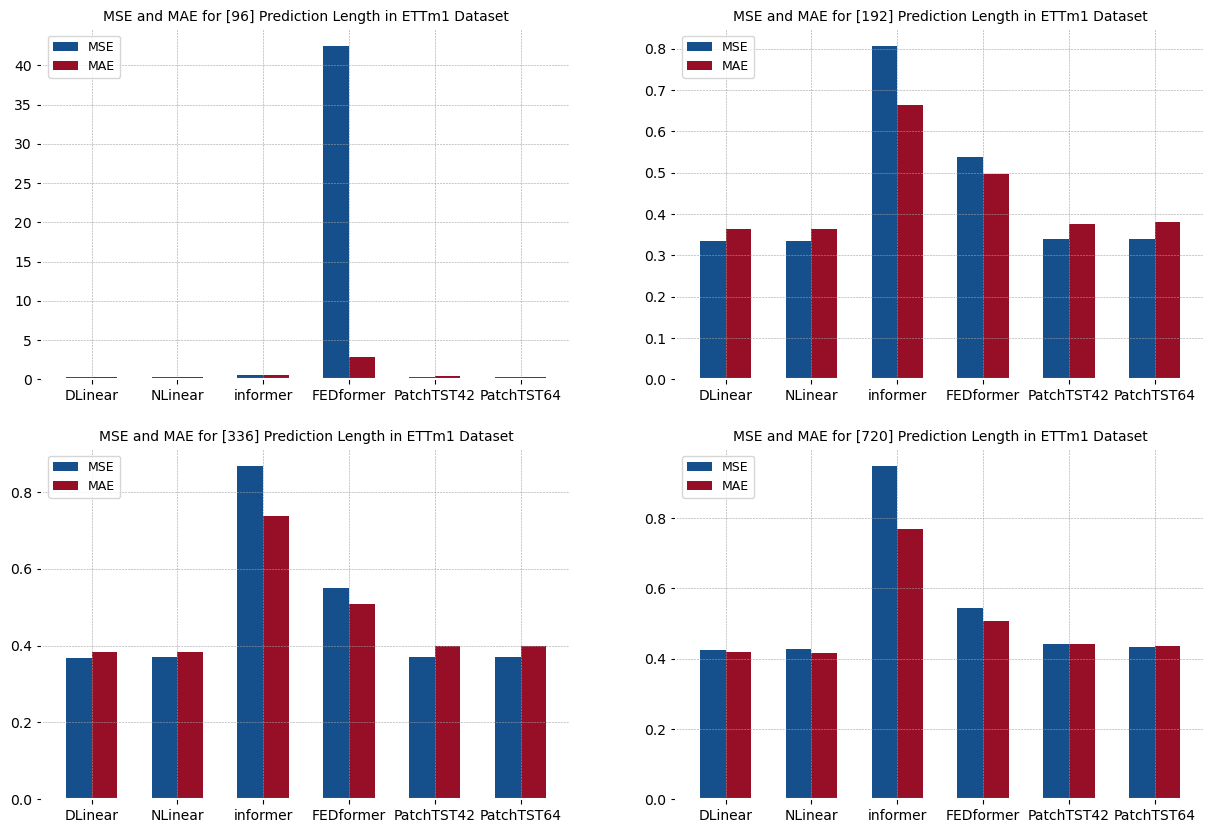

In [269]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Visualize_Error(dataset, pred_len, ax)
    
plt.show()

---
### Evaluating the `ETTm2` dataset

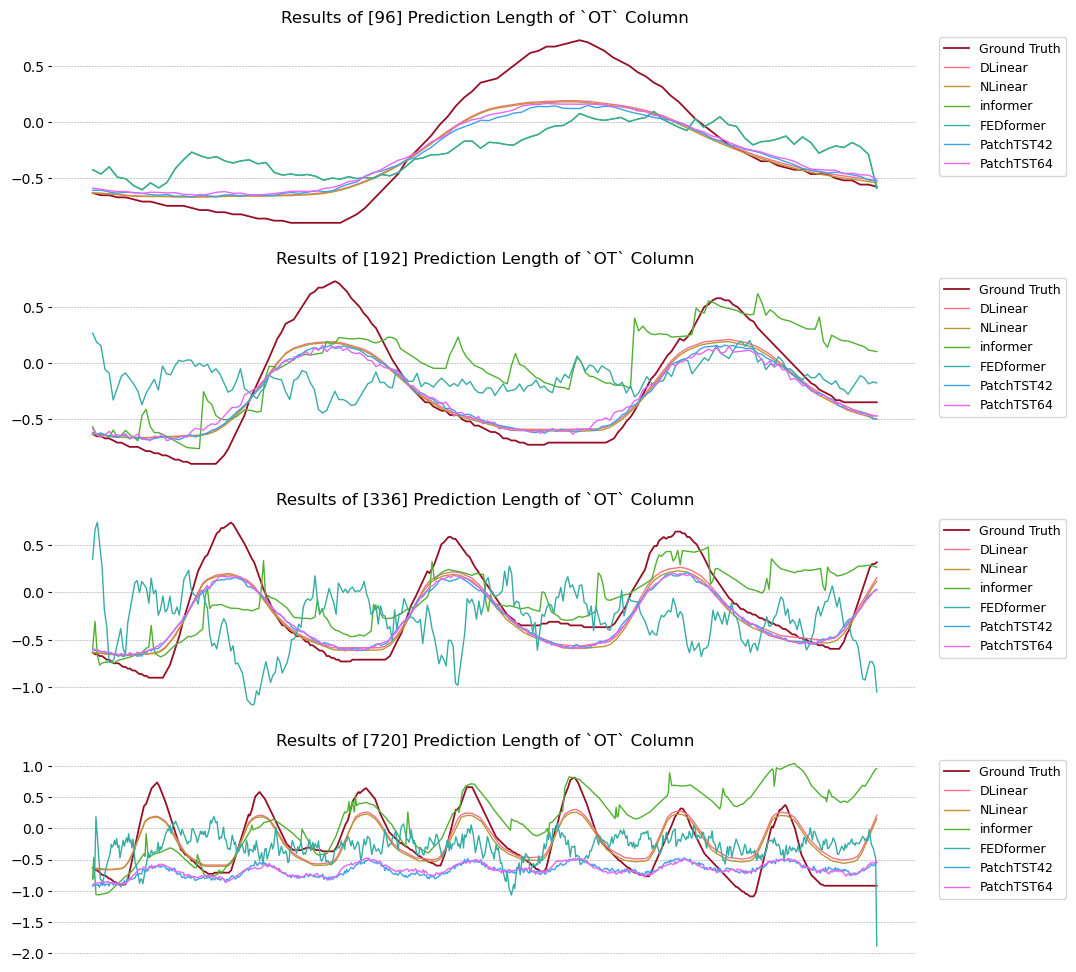

In [297]:
dataset='ETTm2'
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

for i, pred_len in enumerate([96,192,336,720]):
    
    Evaluate(dataset, pred_len, axs[i])

plt.show()

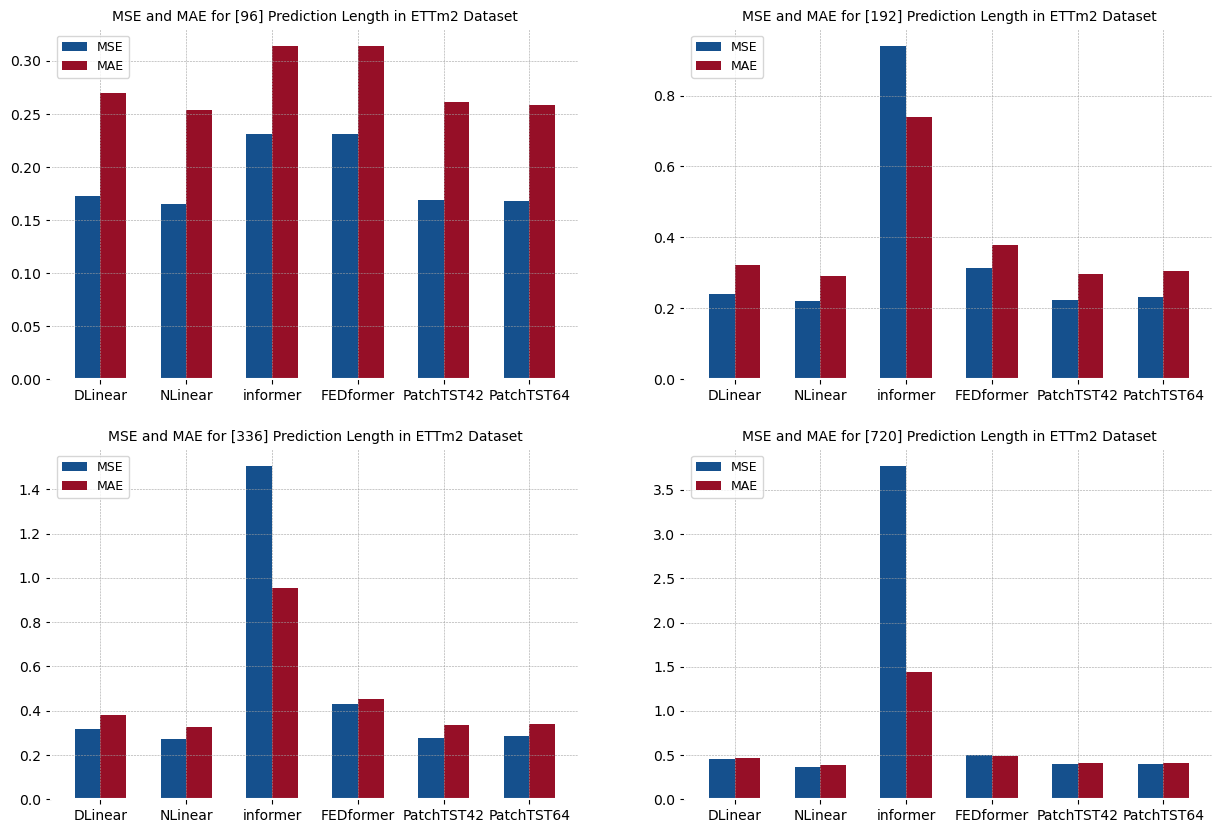

In [271]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Visualize_Error(dataset, pred_len, ax)
    
plt.show()

---
### Evaluating the `crypto_1h` dataset

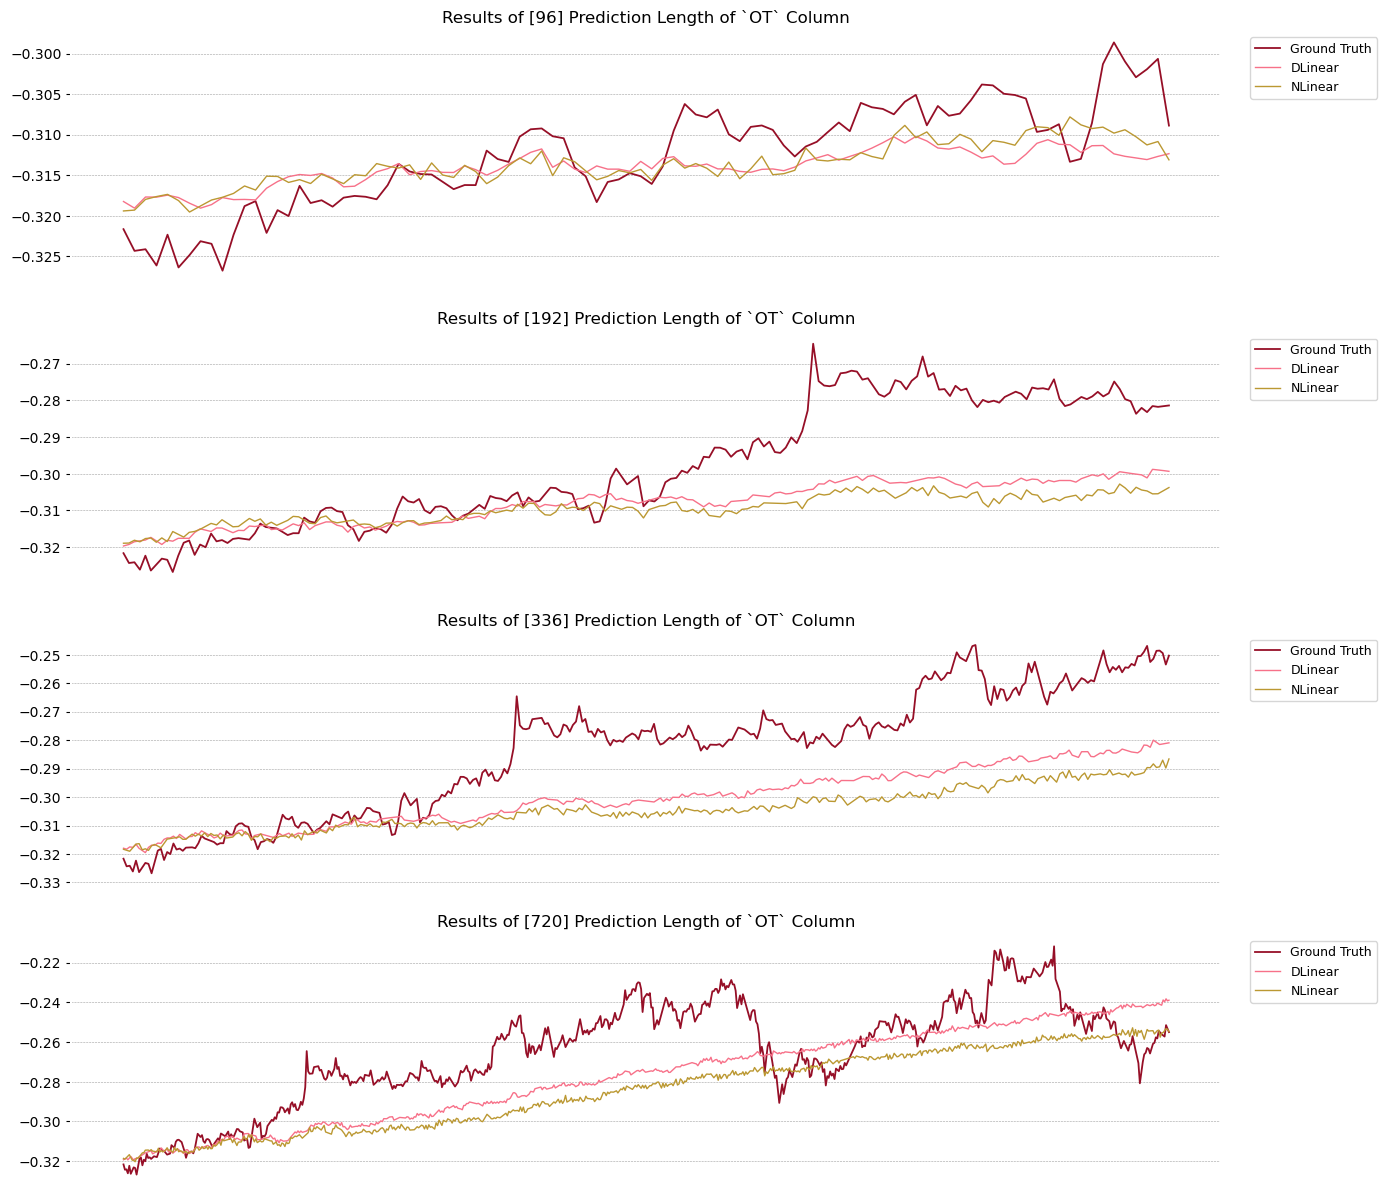

In [272]:
dataset='crypto_1h'
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 15))

for i, pred_len in enumerate([96,192,336,720]):
    
    Evaluate(dataset, pred_len, axs[i], models=['DLinear', 'NLinear',])

plt.show()

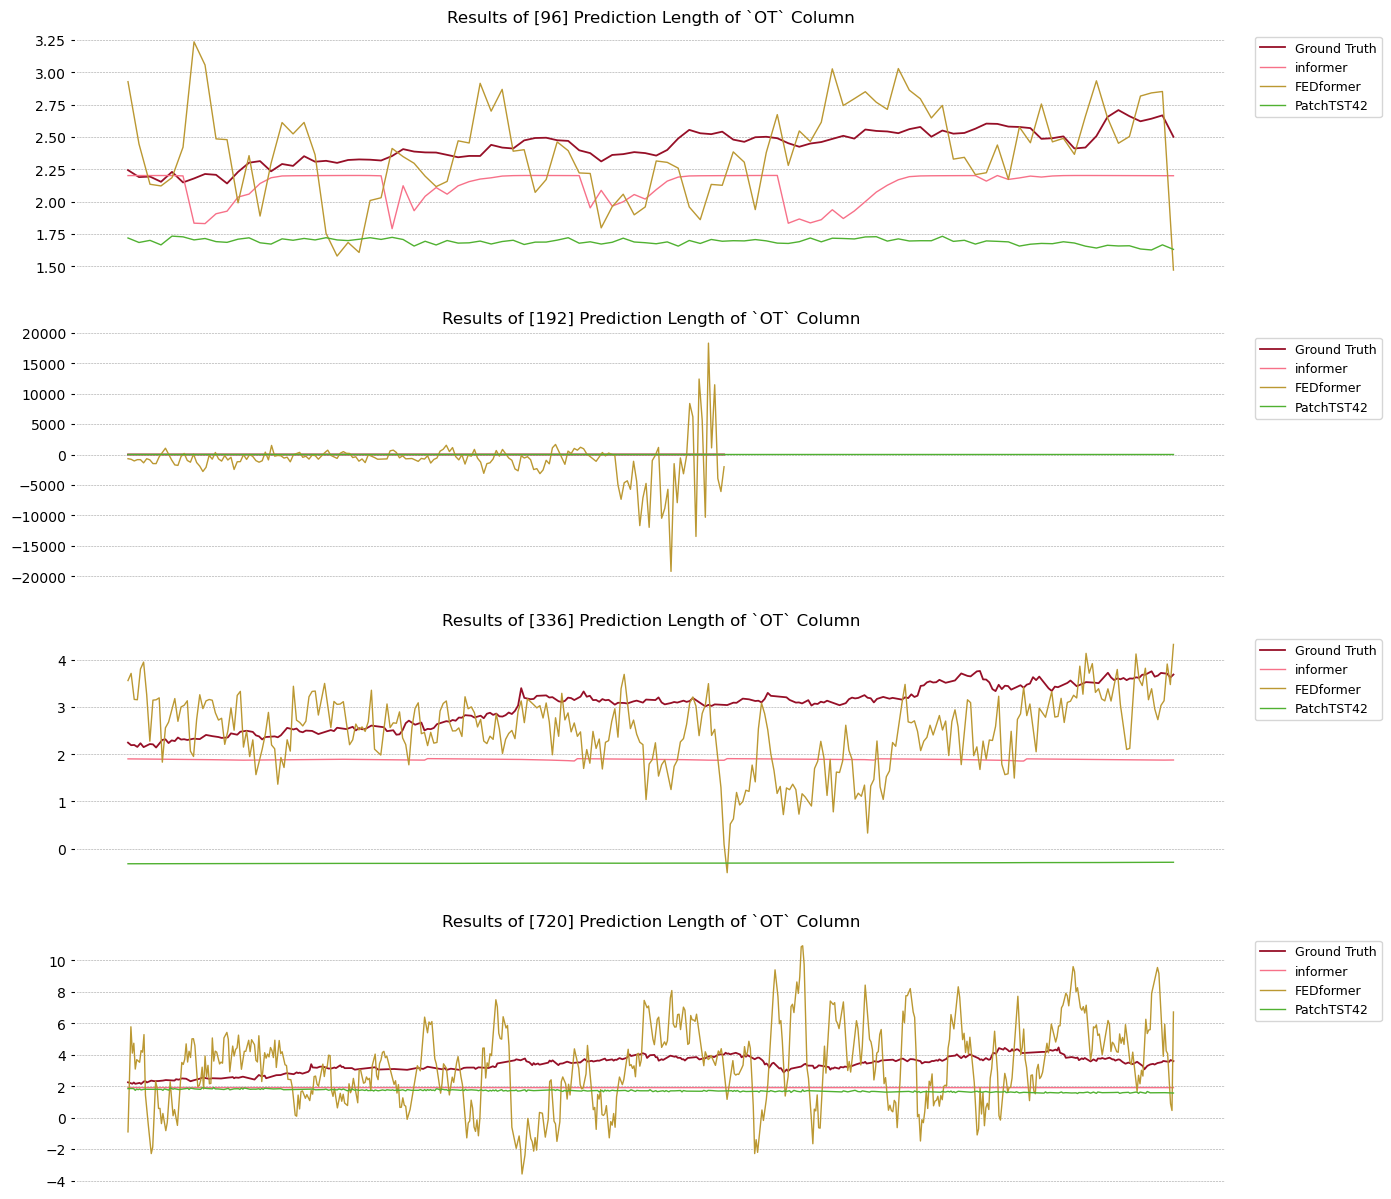

In [277]:
dataset='crypto_1h'
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 15))

for i, pred_len in enumerate([96,192,336,720]):
    
    Evaluate(dataset, pred_len, axs[i], models=['informer', 'FEDformer', 'PatchTST42'])

plt.show()

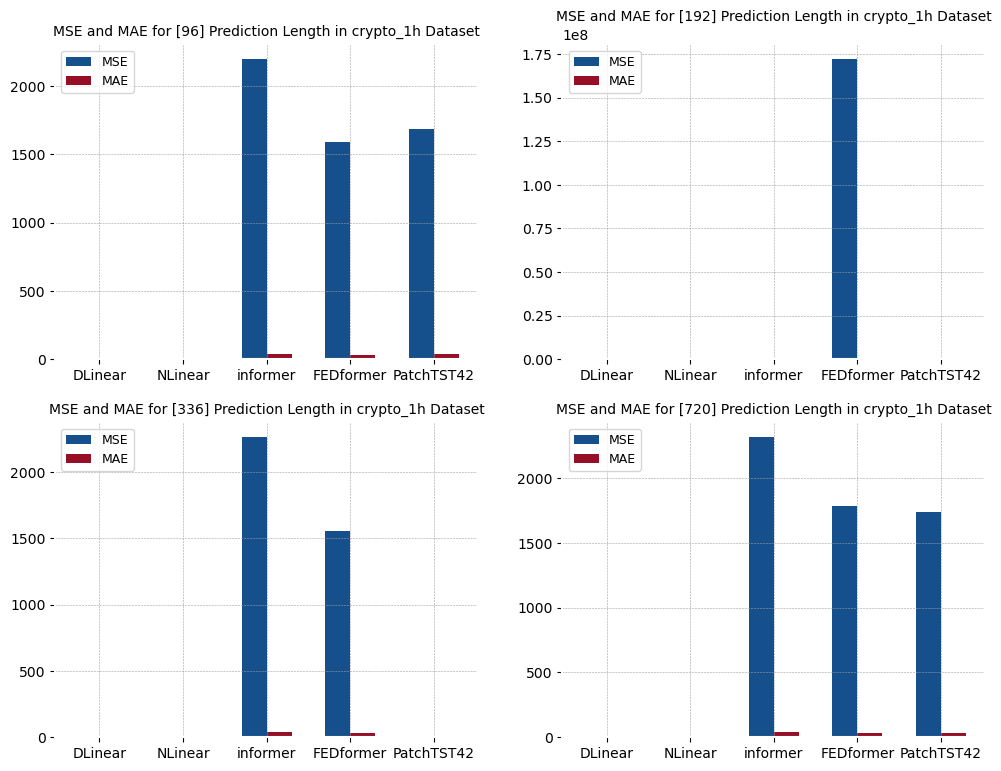

In [282]:
dataset='crypto_1h'
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Visualize_Error(dataset, pred_len, ax, models =['DLinear', 'NLinear','informer','FEDformer','PatchTST42'])
    
plt.show()